### Breast cancer wisconsin (diagnostic) dataset 

#### Preprocessing data

In [1]:
#import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data
from sklearn.datasets import load_breast_cancer
data1= load_breast_cancer()

In [3]:
#showing what is the inside of the data package
data1

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
# Read the DataFrame, first using the feature data
data_cancer = pd.DataFrame(data1.data, columns=data1.feature_names)

# Show the first five rows
data_cancer.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

There are two classes in the dataset: malignant (212 instances, class value 0) and benign (357 instances, class value 1). 

In [5]:
#Checking the NAN value of the data 
Nan_rows= data_cancer[data_cancer.isnull().any(axis=1)]
Nan_rows.head()

Empty DataFrame
Columns: [mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, worst fractal dimension]
Index: []

[0 rows x 30 columns]

In [6]:
#define x and y for breast cancer data 
x_cancer=data_cancer.iloc[:,0:30]
y_cancer=data1.target

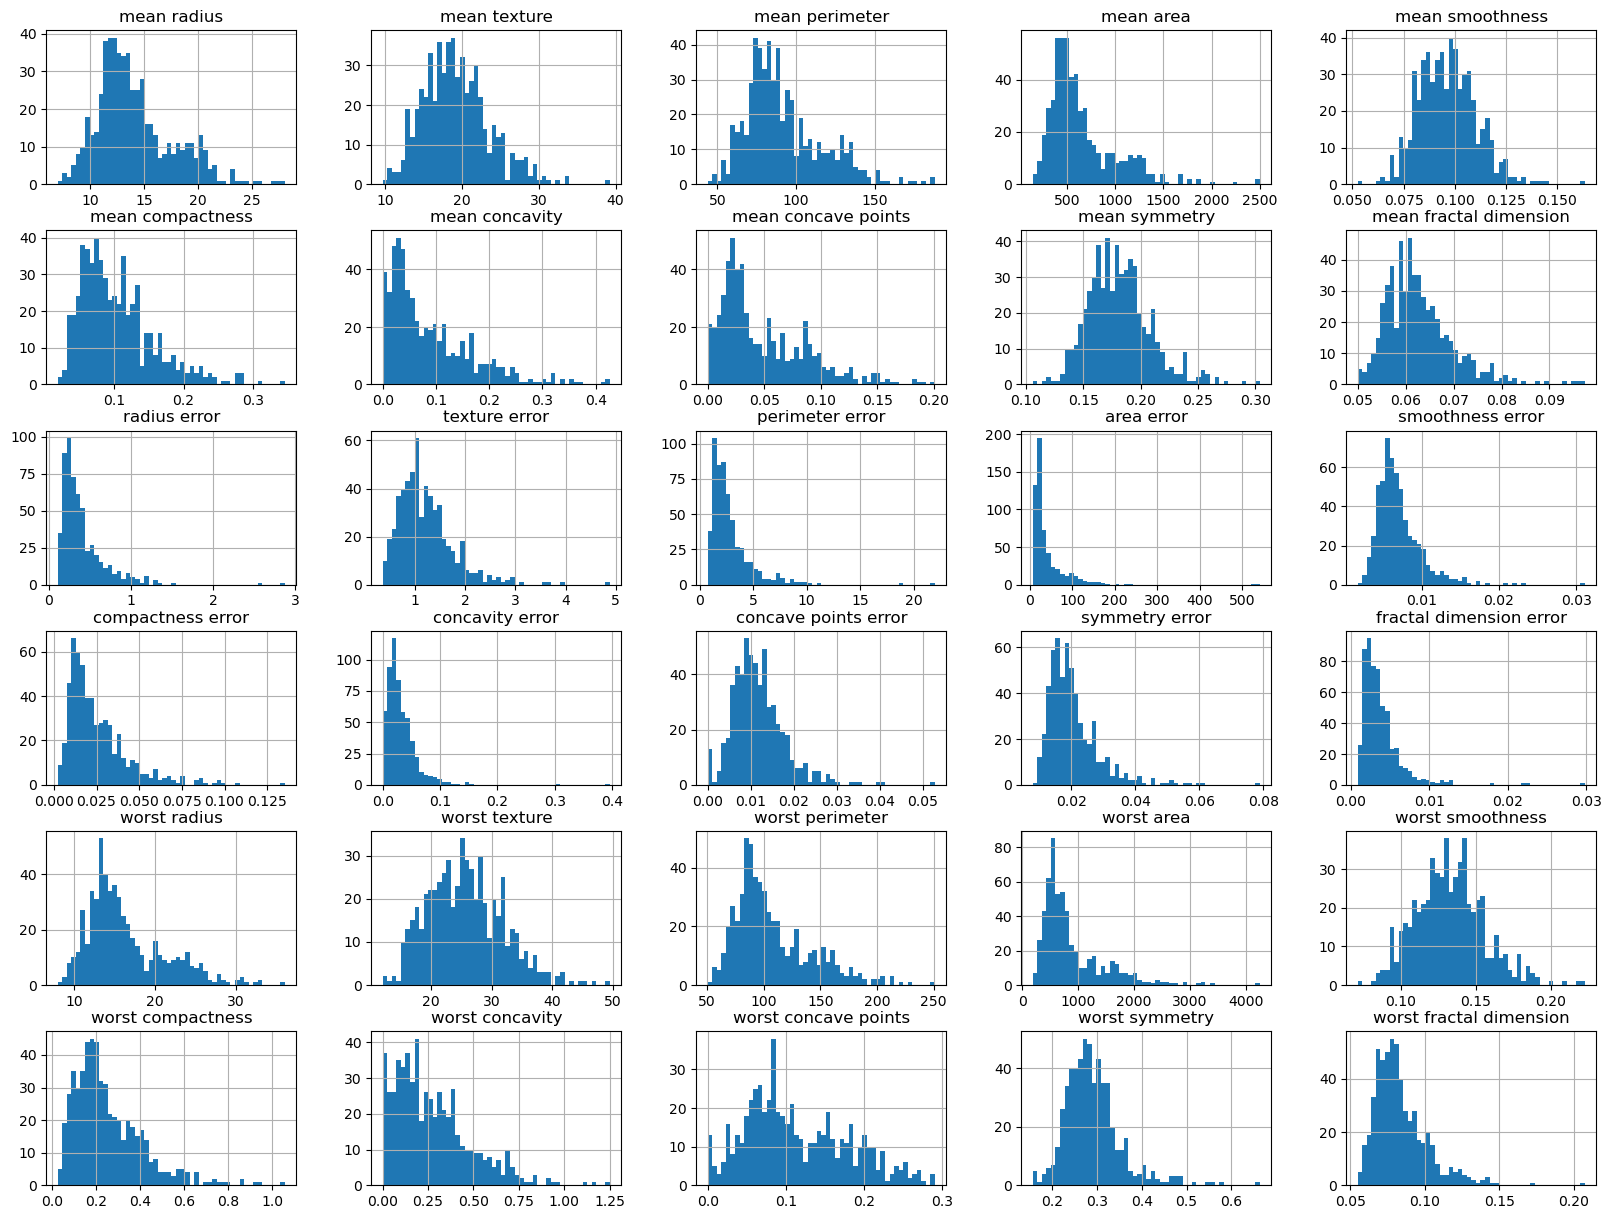

In [7]:
#plot the histogram of the data
x_cancer.hist(bins=50,figsize=(20,15))
plt.show()

There are 30 columns of breast cancer data we got. The values are really varied and have a really different range for each column which means we have to do some scaling before fitting it into the model. Then, we check the NaN value in the data. This step is really important because NaN values can cause errors, many statistical and machine learning algorithms cannot handle missing data, and that also can affect the performance of the models. 

From the plotted histogram, we can see that the majority of the data is concentrated on the left side of the distribution, and there is a long tail to the right which is called as right-skewed data. There are several reasons why data might be right-skewed. One common reason is the presence of outliers or extreme values on the right side of the distribution. Another reason for right-skewed data is that the variable might have a natural lower bound, but no upper bound.

Investigate whether some features can be dropped through some suitable visualisation of the data. For instance, if two features have a linear relationship, then it will be sufficient to keep only one of these features. If you use a different colour in the visualisation to show data points coming from each class, you will find that majorities of the points from the two classes are well separated. So we can assess that the classification task later on should not be too difficult. 
Determine from your visualisation what features can be dropped and write Python code to drop them from your feature matrix X. 
Split X and y into a training set and a test set using the split ratio 85/15 and random state=123.

In [8]:
import seaborn as sn
#show the correlation matrix for seeing the relationship between features
corr_matrix =x_cancer.corr().abs()


In [9]:
corr_matrix

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581      0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension      0.311631      0.076437        0.261477   0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error               0.097317      0.386358        0.086761   0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error            0.222600      0.006614        0.202694   0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error              0.104321      0.009127        0.081629   0.072497   
fractal dimension error     0.042641      0.054458        0.005523   0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                    0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error            0.380676          0.642262        0.683260   
symmetry error                 

From the correlation matrix, we can see that the correlation between all variable are varied, from 0.1 to 0.9, which means that there are multicollinearity between variables that can shadow other variables that are significant to the model. It can be difficult to estimate the contribution of each variable to the outcome variable. Then, we choose 0.8 as the cutoff for correlation value because correlations above this value are considered to be very high. So, we will evaluate variable that has more than 0.8 correlation below.

In [10]:
# Find features with correlation greater than 0.9
planned_to_drop = [column for column in corr_matrix.columns if any((corr_matrix[column] > 0.9) & (corr_matrix[column] < 1))]

In [11]:
#showing the variable that is greater than 0.9
planned_to_drop

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean concavity',
 'mean concave points',
 'radius error',
 'perimeter error',
 'area error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst concave points']

As we can see, there are 14 variables that have more than 0.9. Having such high correlations can cause problems in statistical analyses, particularly in regression models where multicollinearity can be an issue. We will be dropping some of variables but we have to see which of these variables are significant to the target variables by considering the value of the correlation toward target variable.

In [12]:
#define new list only containing the high correlated variable and the target
high_correlated_and_target = data_cancer[planned_to_drop]
high_correlated_and_target['target'] = y_cancer

In [13]:
# compute the correlation between each feature and the target variable
corr_new = high_correlated_and_target.corr()

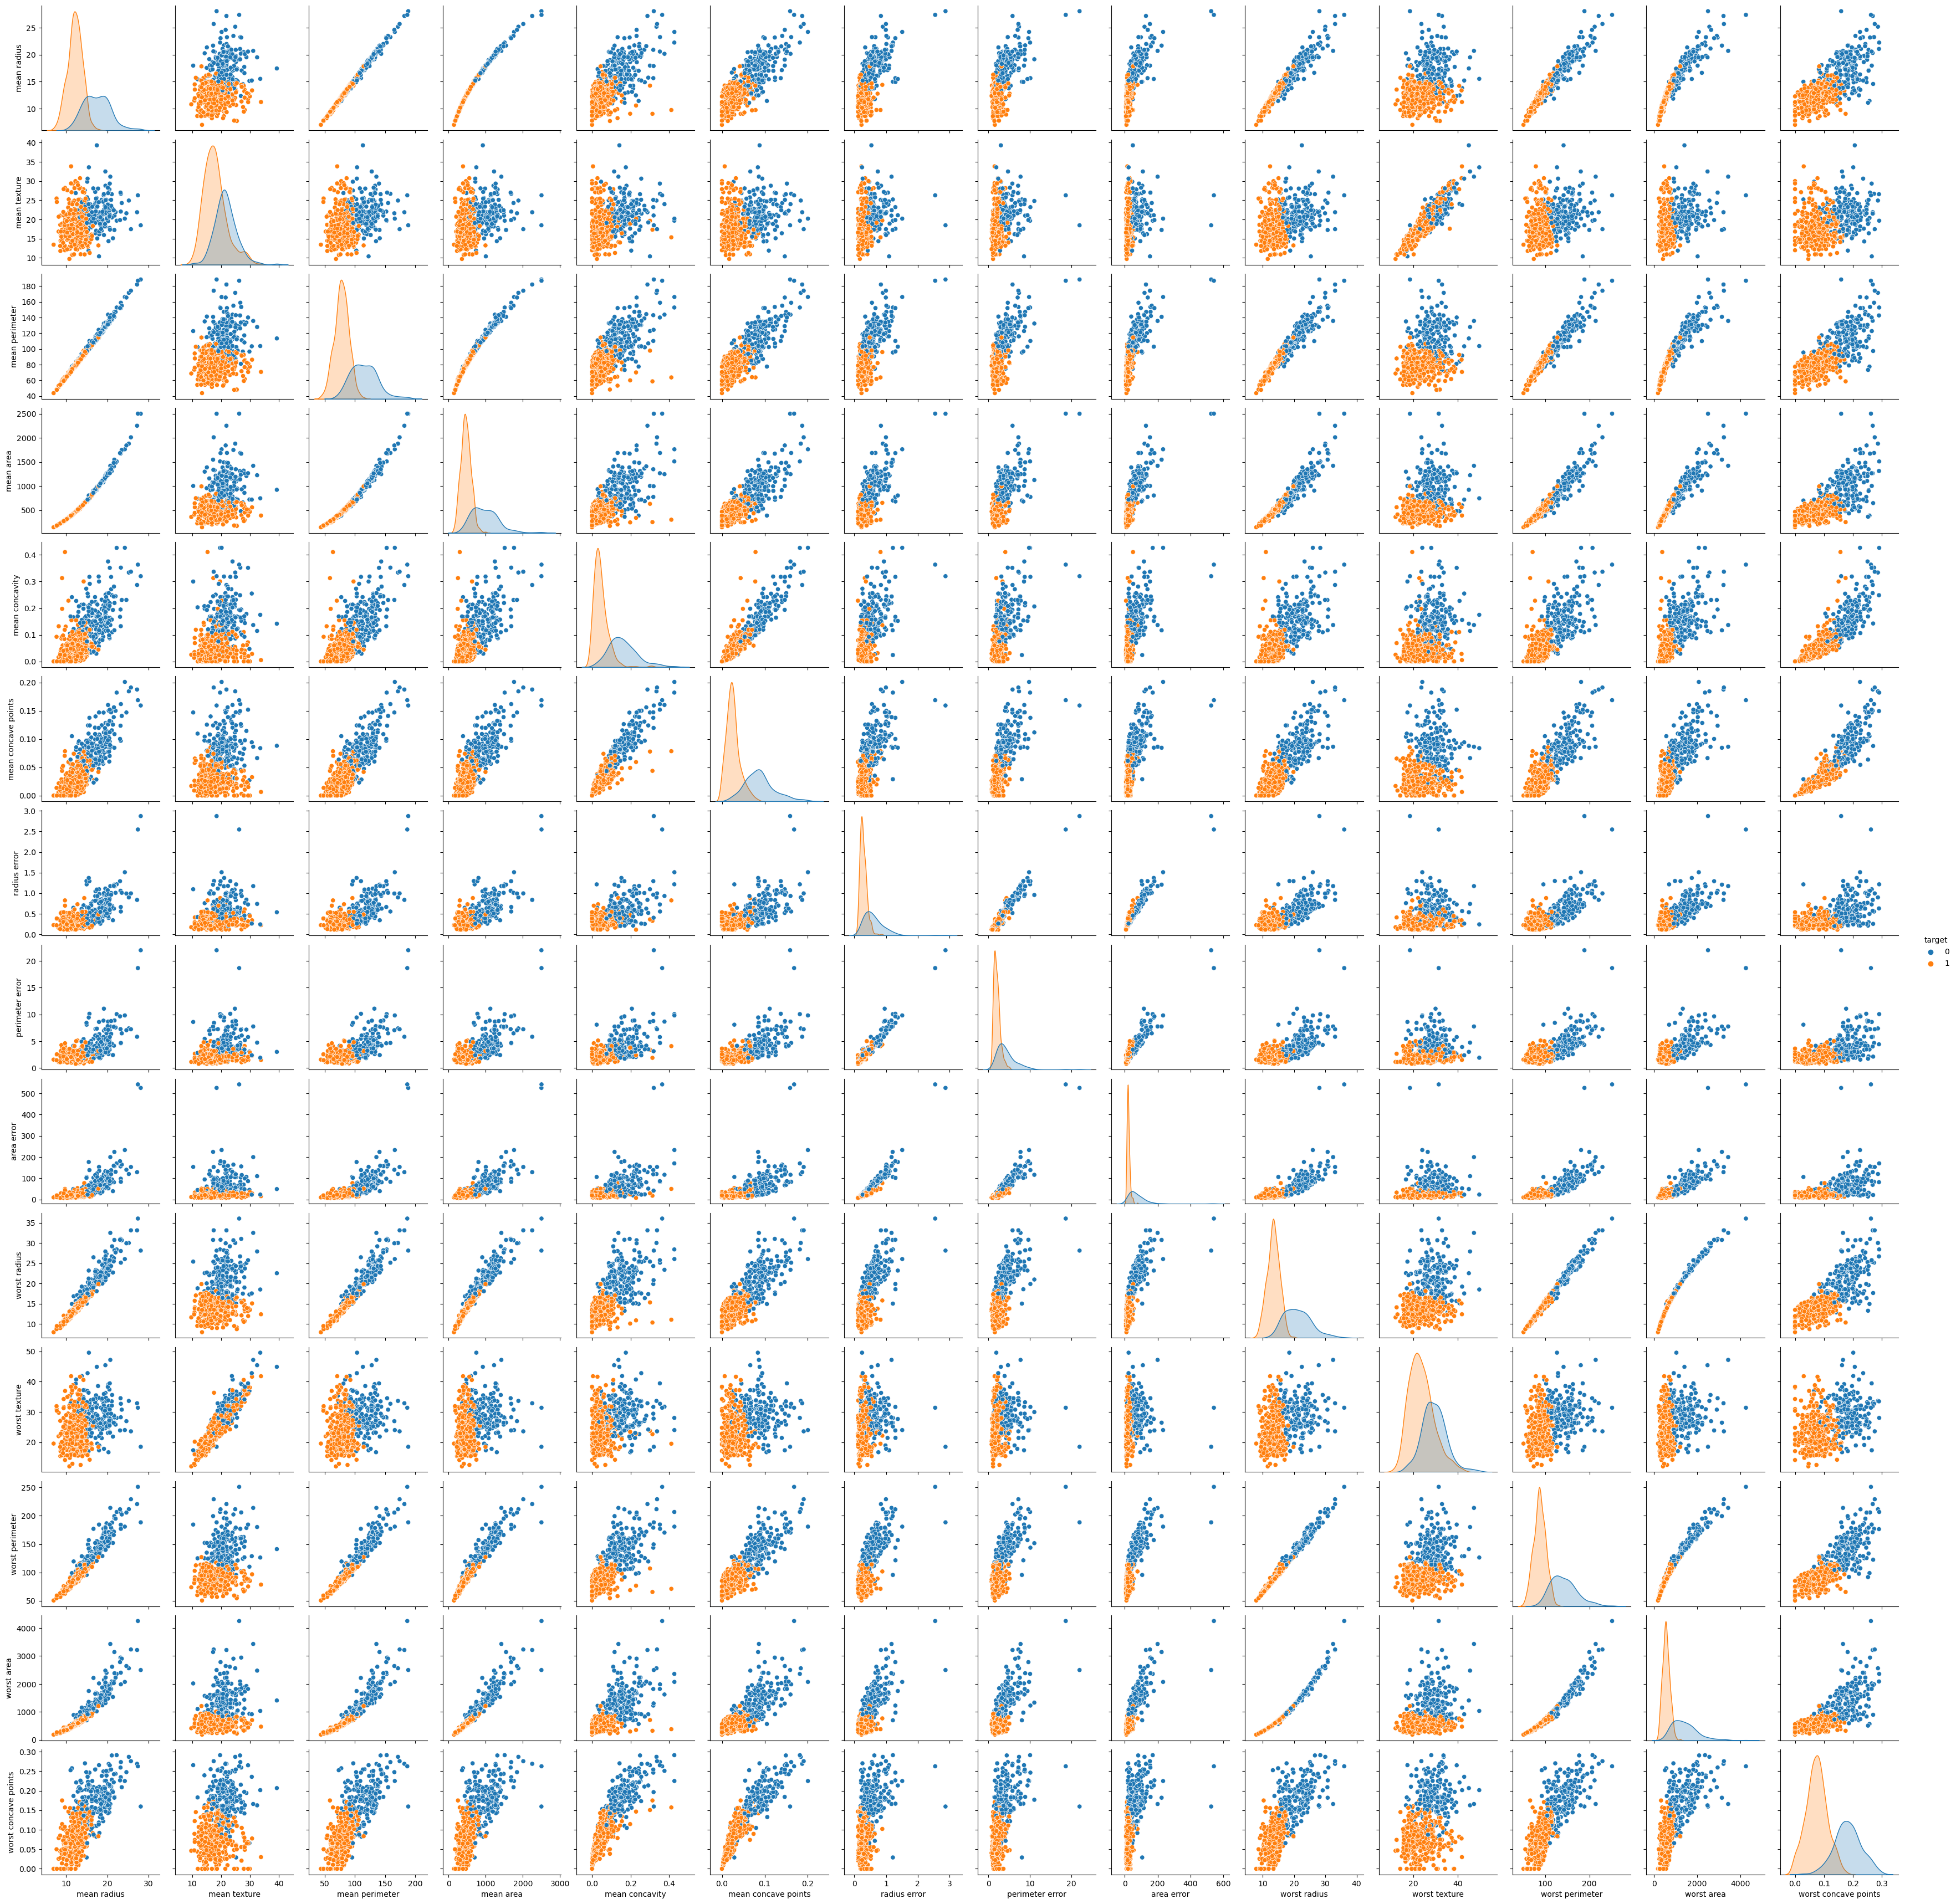

In [14]:
#Plot the pair plot 
sn.pairplot(high_correlated_and_target, hue='target')

The pair plot shows that some of the variable have strong positive linear relationships, it is not surprising since we have more than 0.9 correlation value such as the variable 'mean perimeter' vs mean area, 'mean perimeter' vs  'worst radius', 'mean perimeter vs 'worst perimeter', and many more. The 'hue' is showing how the categorical variable being plotted in the scatter plot, some of the parameters are showing good separation between 'malignant' and 'benign' like 'meanperimeter', 'worst concave points'. We will evaluate which variables to be dropped with the correlation heatmap below.

<Axes: >

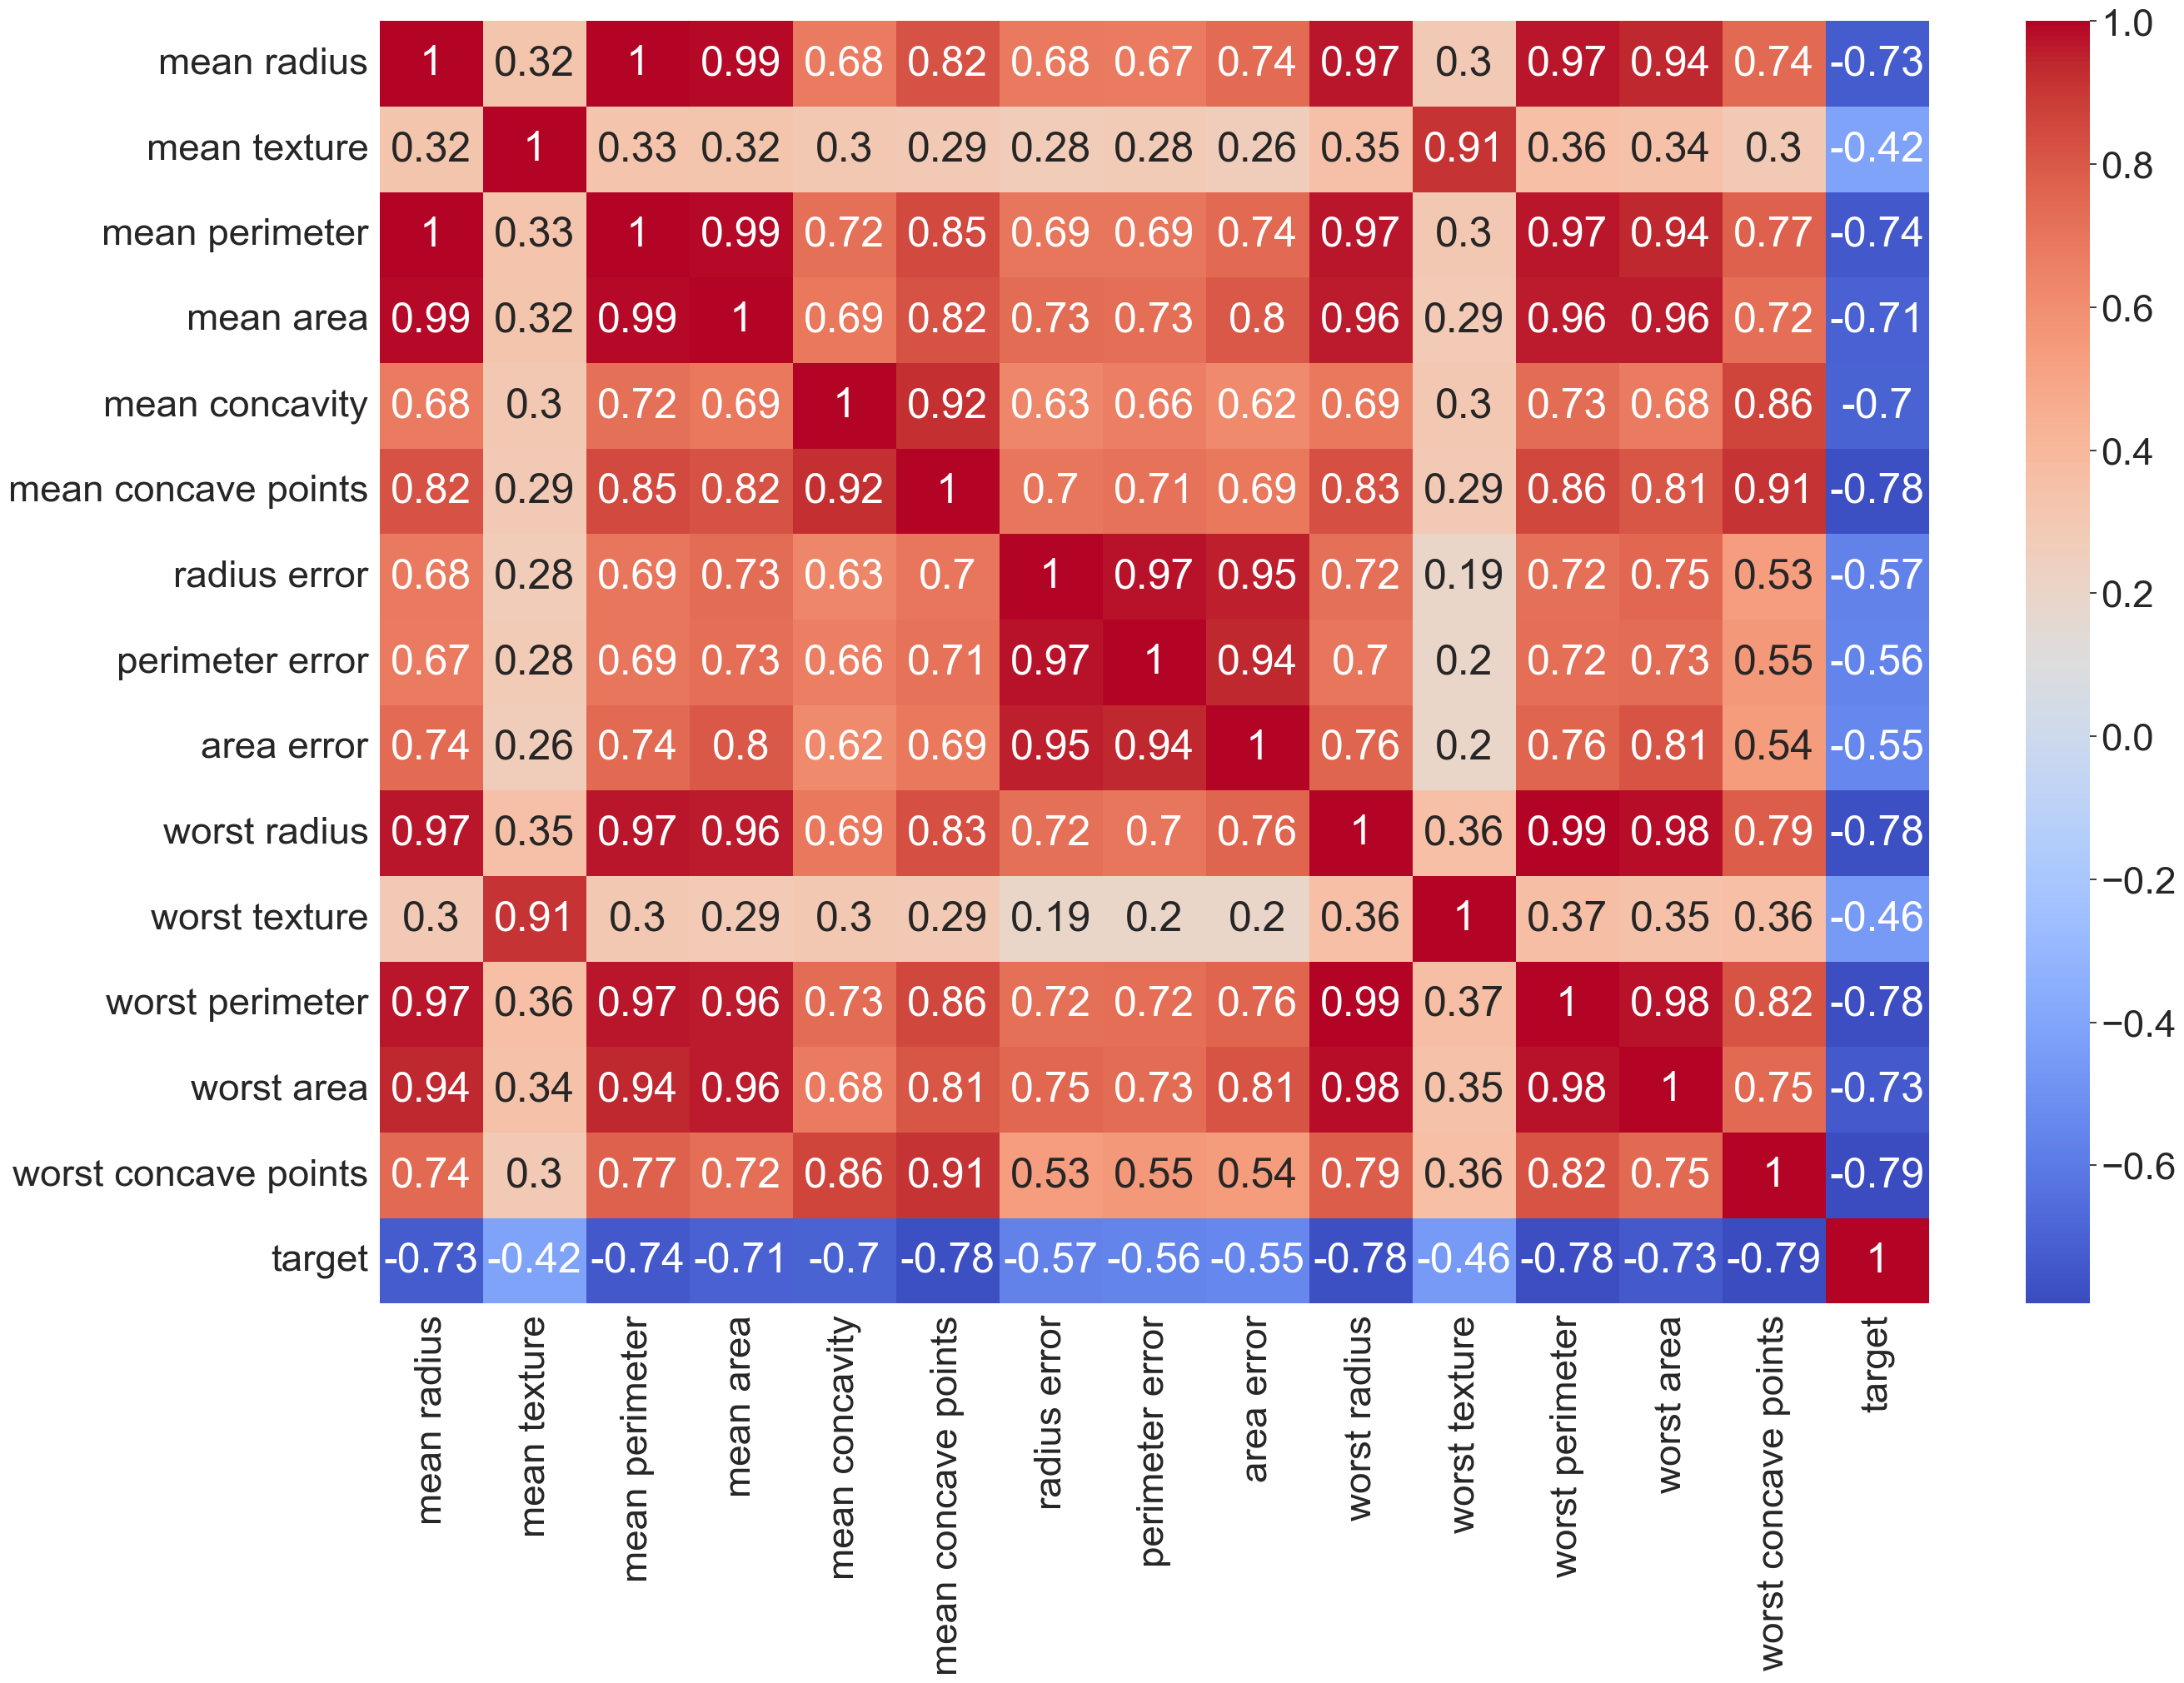

In [15]:
# Create a correlation matrix plot
plt.figure(figsize=(30,20))

sn.set(font_scale=3)
sn.heatmap(corr_new, cmap='coolwarm', annot=True)

In [16]:
to_drop = ['mean area', 'mean radius', 'mean texture','mean perimeter', 'mean concave points', 'worst area', 'worst radius',
           'mean concavity', 'radius error', 'perimeter error','area error', 'worst texture']

After evaluating with correlation matrix, we get 12 variables need to be dropped. First, dropping the variable that has less than 0.7. Next, for two variables that have > 0.9, we consider its correlation value against the target. if it has correlation less than the other variable, then it has to be dropped.

In [17]:
#dropping the chosen variable
x_cancer.drop(to_drop, axis=1, inplace=True)

In [18]:
#showing the new x variables that has only 18 variables
x_cancer.head()

mean smoothness  mean compactness  mean symmetry  mean fractal dimension  \
0          0.11840           0.27760         0.2419                 0.07871   
1          0.08474           0.07864         0.1812                 0.05667   
2          0.10960           0.15990         0.2069                 0.05999   
3          0.14250           0.28390         0.2597                 0.09744   
4          0.10030           0.13280         0.1809                 0.05883   

   texture error  smoothness error  compactness error  concavity error  \
0         0.9053          0.006399            0.04904          0.05373   
1         0.7339          0.005225            0.01308          0.01860   
2         0.7869          0.006150            0.04006          0.03832   
3         1.1560          0.009110            0.07458          0.05661   
4         0.7813          0.011490            0.02461          0.05688   

   concave points error  symmetry error  fractal dimension error  \
0               0.01587         0.03003                 0.006193   
1               0.01340         0.01389                 0.003532   
2               0.02058         0.02250                 0.004571   
3               0.01867         0.05963                 0.009208   
4               0.01885         0.01756                 0.005115   

   worst perimeter  worst smoothness  worst compactness  worst concavity  \
0           184.60            0.1622             0.6656           0.7119   
1           158.80            0.1238             0.1866           0.2416   
2           152.50            0.1444             0.4245           0.4504   
3            98.87            0.2098             0.8663           0.6869   
4           152.20            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678

In [19]:
#Importing the module
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [20]:
#defining a variable for scaler
scaler = MinMaxScaler() 

#scalling the value for all features
x_cancer_scaled = scaler.fit_transform(x_cancer)

#import train_test_split data
from sklearn.model_selection import train_test_split

#splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(x_cancer_scaled, y_cancer, test_size=0.15, random_state=123)

#### Building ML Model

Decision Tree Classifier

In [21]:
#import modul for decision tree model
from sklearn.tree import DecisionTreeClassifier

#Construct Decision tree Classifier
tree_class = DecisionTreeClassifier(random_state=123)
tree_class.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [22]:
# Predict the classes of the training and testing data
y_pred_train = tree_class.predict(X_train)
y_pred_test = tree_class.predict(X_test)

Then we use the trained classifier to perform predictions on the training set and the test set. Compare the accuracy scores for the two sets.

In [23]:
#accuracy for training and test data

from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy_train: {accuracy_train:.2f}")
print(f"Accuracy_test: {accuracy_test:.2f}")

Accuracy_train: 1.00
Accuracy_test: 0.95


 The model is likely overfitting the training data that can bee seen with the accuracy of 100% for training data which is not desirable. Meanwhile for test data it has lower accuracy, 95%, can be considered to be a good result, as it indicates that the model is able to make accurate predictions on test data. Overfitting happens when a model can't generalise and instead fits too closely to the training dataset instead. Overfitting happens due to several reasons, such as: The training data size is too small and does not contain enough data samples to accurately represent all possible input data values. To avoid this, it is important to use techniques such as regularization and cross-validation.

Display the decision tree built from the training process (like the one shown in Figure 6.1 of the textbook for the iris dataset). We need to restrict the depth of the tree for the display (e.g., by setting max depth=3); otherwise, the diagram will be too large. S

In [24]:
# Print the number of branches in the decision tree
num_branches = tree_class.tree_.node_count
tree_depth = tree_class.get_depth()
num_branches, tree_depth

(53, 8)

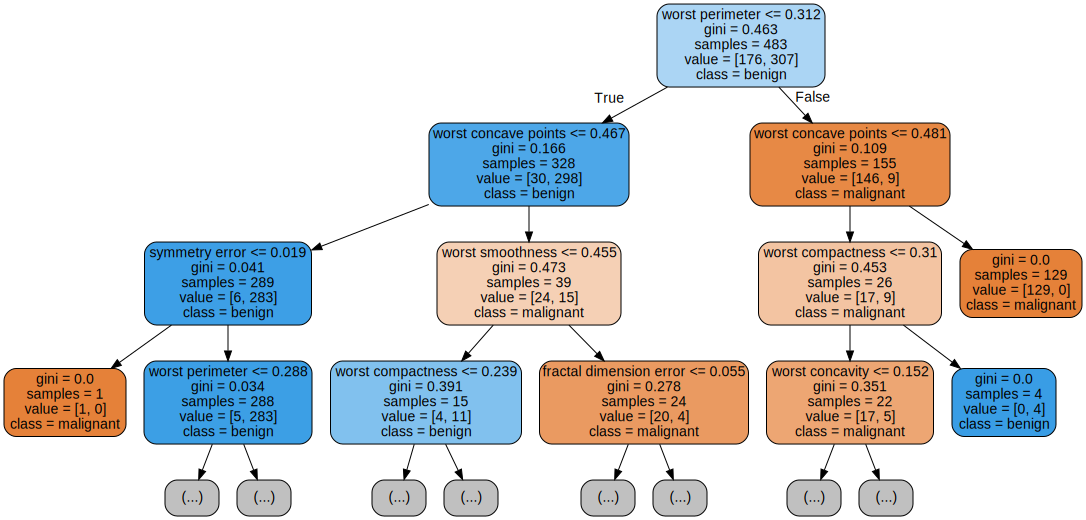

In [25]:
# Displaying decision tree to see what is the reason for overfitting 
from graphviz import Source
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

dot_data= export_graphviz(
        tree_class,
        feature_names=x_cancer.columns.tolist(),
        class_names=data1.target_names,
        filled=True,
        rounded=True,
        max_depth = 3
    )

graph = graphviz.Source(dot_data)
display(graph)


The decision tree has many branches, up to 53 branches with the maximum depth is 8. With this many branches, one of the branches contain only a fewer number, we can see in the plot, there is branche that has only 1 sample, also the other branches only has 15. If the decision tree has many branches and leaves, and the leaves have only a few samples, it may indicate that the model is overfitting the training data. This is because the model has created too many decision rules to capture the characteristic of the training data, including the noise or random fluctuations in the data. As a result, the model may perform poorly on new, unseen data because it has overfit to the training data and is not able to generalize well to new data points.


Next, we construct a second decision tree classifier by setting the hyperparameter max depth=3. Repeat all the steps above for this new classifier. Compare the accuracy scores for the training set and test sets with those from the previous classifier.

In [26]:
#Construct Decision tree Classifier
tree_class2 = DecisionTreeClassifier(max_depth = 3, random_state=123)
tree_class2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [27]:
# Predict the classes of the training and testing data
y_pred_train2 = tree_class2.predict(X_train)
y_pred_test2 = tree_class2.predict(X_test)

In [28]:
#accuracy for training and test data

accuracy_train2 = accuracy_score(y_train, y_pred_train2)
accuracy_test2 = accuracy_score(y_test, y_pred_test2)

print(f"Accuracy_train: {accuracy_train2:.2f}")
print(f"Accuracy_test: {accuracy_test2:.2f}")

Accuracy_train: 0.96
Accuracy_test: 0.92


The drop in training accuracy and a relatively slight reduction in test accuracy suggest that changing max_depth=3 has decreased overfitting and improved generalisation performance. The model is still capable to capture a large amount of information in the data while also avoiding overfitting, as shown by accuracy values of 0.96 on the training data and 0.92 on the test data.

In this step, we construct a third decision tree classifier by setting the hyperparameter min samples split=5. Then repeat all the steps above for this new classifier. Compare the accuracy scores for the trainingset and test set with those from all the previous classifiers.

In [29]:
#Construct Decision tree Classifier

tree_class3 = DecisionTreeClassifier(min_samples_split=5, max_depth = 3, random_state=123)
tree_class3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=123)

In [30]:
# Predict the classes of the training and testing data
y_pred_train3 = tree_class3.predict(X_train)
y_pred_test3 = tree_class3.predict(X_test)

In [31]:
#accuracy for training and test data

accuracy_train3 = accuracy_score(y_train, y_pred_train3)
accuracy_test3 = accuracy_score(y_test, y_pred_test3)

print(f"Accuracy_train: {accuracy_train3:.2f}")
print(f"Accuracy_test: {accuracy_test3:.2f}")

Accuracy_train: 0.96
Accuracy_test: 0.92


min_sample_split = 5 will force the decision tree to have a minimum number of samples needed to split an internal node, it can help to further reduce overfitting and improve generalisation performance. This can stop the tree from splitting excessively and from growing an excessive number of branches that suit the training data's noise. Given a training accuracy of 0.96 and a test accuracy of 0.92 , it appears that the combination of these hyperparameters has produced accuracy values that are similar to those obtained before. With the fact that these scores for accuracy could not significantly improve from before, we need to tune another parameter to get the better performance of the model.

We then construct a fourth decision tree classifier by setting the hyperparameter min samples leaf=5.

In [32]:
#Construct Decision tree Classifier
tree_class4 = DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5, max_depth = 3, random_state=123)
tree_class4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=5,
                       random_state=123)

In [33]:
# Predict the classes of the training and testing data
y_pred_train4 = tree_class4.predict(X_train)
y_pred_test4 = tree_class4.predict(X_test)

In [34]:
#accuracy for training and test data

accuracy_train4 = accuracy_score(y_train, y_pred_train4)
accuracy_test4 = accuracy_score(y_test, y_pred_test4)

print(f"Accuracy_train: {accuracy_train4:.2f}")
print(f"Accuracy_test: {accuracy_test4:.2f}")

Accuracy_train: 0.96
Accuracy_test: 0.92


The decision tree would need to include at least 5 samples for each leaf node if min_samples_leaf=5. The algorithm would keep looking for splits that satisfied the min_samples_leaf condition if a split in the tree would produce a leaf node with less than 5 samples. Even after tuning another parameter into the model, the accuracy has not shown any improvement, since the model is already performing well. So min_sample_leaf = 5 may not give significant effect into the model. It is better to do some of the Cross Validation to see which combination of parameter is the best for the model.

Use a 3-fold cross-validation and grid-search to find the best combination of these hyperparameters (max depth, min samples split and min samples leaf). Report the results of the cross-validation. Compare the values of the best hyperparameters from the cross-validation with the ones you used before and comment on them

In [35]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 5, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=123), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 5, 8]},
             verbose=1)

In [36]:
print(grid_search_cv.best_estimator_)

DecisionTreeClassifier(max_depth=5, random_state=123)


After running a grid search with cross-validation, we only got one hyperparameter. It means that the other hyperparameters in the search had little to no effect on how well the model performed. This is not unusual because the performance of the model might be affected by the importance of certain hyperparameters. A decision tree with a maximum depth of 5 was able to perform the best on the validation data since max_depth=5 was the best hyperparameter found.

Therefore, we use the best hyperparameters from the 3-fold cross-validation and report the training and test set results. 

In [37]:
#Construct Decision tree Classifier
tree_class5 = DecisionTreeClassifier(max_depth = 5, random_state=123 )
tree_class5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

In [38]:
# Predict the classes of the training and testing data
y_pred_train5 = tree_class5.predict(X_train)
y_pred_test5 = tree_class5.predict(X_test)

In [39]:
#confusion matrices and performance metrics 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

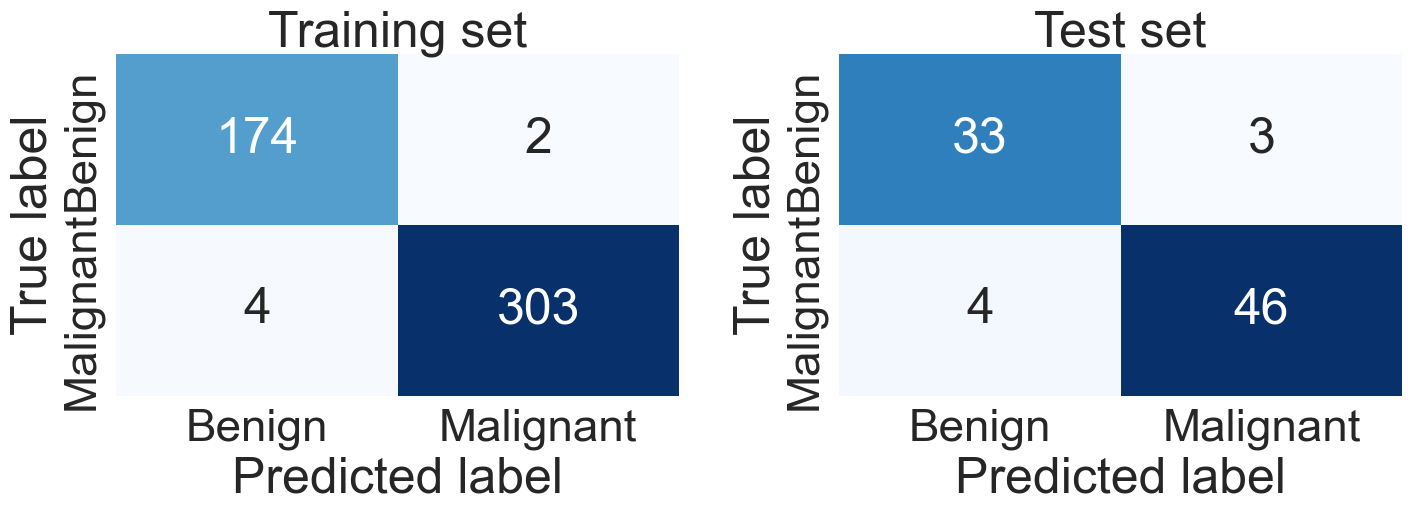

In [42]:
# Define the labels for the confusion matrix
labels = ['Benign', 'Malignant']

# Compute the confusion matrix for the training data
cm_train = confusion_matrix(y_train, y_pred_train5)

# Compute the confusion matrix for the test data
cm_test = confusion_matrix(y_test, y_pred_test5)

# Create a figure with two subplots
fig, ax = plt.subplots(ncols=2, figsize=(15, 6))

# Plot the confusion matrix for the training data
sn.heatmap(cm_train, ax=ax[0], annot=True, fmt='.0f', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('Training set')

# Plot the confusion matrix for the test data
sn.heatmap(cm_test, ax=ax[1], annot=True, fmt='.0f', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('Test set')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()


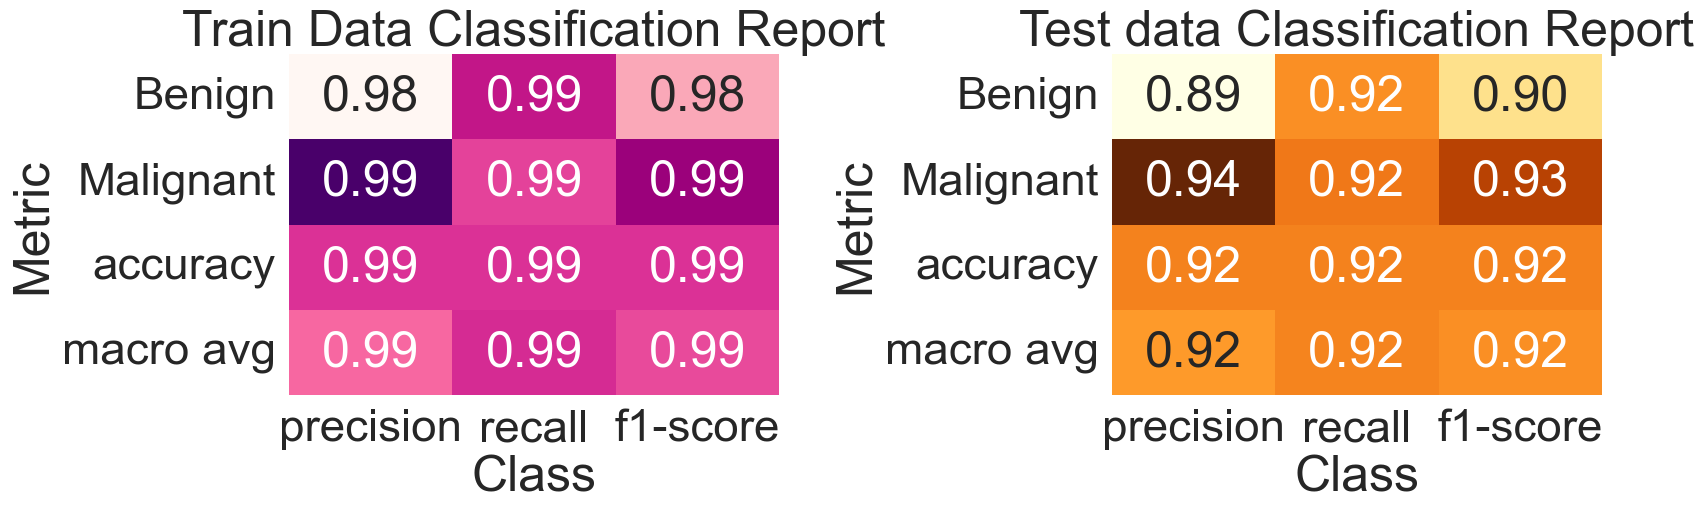

In [44]:
# Define the labels for the classification report
labels = ['Benign', 'Malignant']

# Generate the classification report for the first model
report1 = classification_report(y_train, y_pred_train5, target_names=labels, output_dict=True)
df_report1 = pd.DataFrame(report1).transpose()

# Generate the classification report for the second model
report2 = classification_report(y_test, y_pred_test5, target_names=labels, output_dict=True)
df_report2 = pd.DataFrame(report2).transpose()

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 6))

# Plot the classification report for the first model
sn.heatmap(df_report1.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='RdPu', cbar=False, ax=axes[0])
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Metric')
axes[0].set_title('Train Data Classification Report')

# Plot the classification report for the second model
sn.heatmap(df_report2.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='YlOrBr', cbar=False, ax=axes[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Metric')
axes[1].set_title('Test data Classification Report')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

The model obtained a very high accuracy of 99% for the training set. The model is performing quite well on the training set as shown by the excellent accuracy, recall, and F1-score for both classes (0 and 1).  The model's accuracy on the test set was 92%, which was less than its accuracy on the training set. This shows that the model may not be generalising properly to new data and may be overfitting to the training set. Although there may be a chance for improvement, the model is still doing reasonably well on the test set as evidenced by the high precision, recall, and F1-score for both classes.